<a href="https://colab.research.google.com/github/ujin2021/NLP_CAMP/blob/main/day1/01_02_simple_project_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVN

In [51]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [52]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답 (문장별로 긍정/부정)
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [53]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [54]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [55]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [56]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [57]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [58]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [59]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [60]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [61]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [62]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden # shape = (2, 4, 8) input의 shape가 (2, 4) (문장두개, 단어네개), 한 단어당 8개로

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.01600952, -0.02867161,  0.0490527 ,  0.02694185,
         -0.02442247,  0.00242256, -0.03835633, -0.01112419],
        [-0.0286734 , -0.0297141 ,  0.01743609,  0.0420645 ,
         -0.02302362, -0.00117997, -0.01170771, -0.01250789],
        [ 0.03796058, -0.02714941,  0.0467687 ,  0.04954524,
         -0.01518697, -0.01868795,  0.00816096, -0.01388646],
        [-0.00439847,  0.01194475, -0.04764805, -0.03494954,
         -0.02959934, -0.02002832,  0.03595058,  0.04567074]],

       [[ 0.01600952, -0.02867161,  0.0490527 ,  0.02694185,
         -0.02442247,  0.00242256, -0.03835633, -0.01112419],
        [-0.0286734 , -0.0297141 ,  0.01743609,  0.0420645 ,
         -0.02302362, -0.00117997, -0.01170771, -0.01250789],
        [ 0.01784401,  0.02445991, -0.00280247, -0.03154701,
          0.0024224 , -0.02964656,  0.0248563 , -0.00087682],
        [ 0.04162117, -0.04413425, -0.0117738 , -0.03286532,
         -0.02149026, -0.

In [63]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[ 0.03796058,  0.01194475,  0.0490527 ,  0.04954524, -0.01518697,
         0.00242256,  0.03595058,  0.04567074],
       [ 0.04162117,  0.02445991,  0.0490527 ,  0.0420645 ,  0.0024224 ,
         0.00242256,  0.0248563 ,  0.00358213]], dtype=float32)>

In [64]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs # 긍정, 부정 확률

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.49208006, 0.50791997],
       [0.49369788, 0.5063022 ]], dtype=float32)>

In [65]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    
    # 입력 문장을 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)

    # 문장 vector를 이용해 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)
    
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

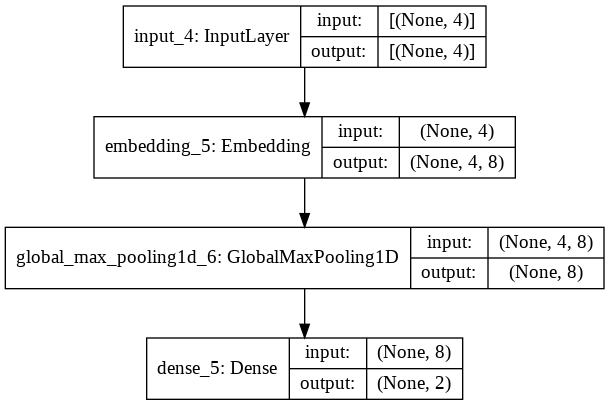

In [66]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [67]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 0s 364ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5000
Epoch 11/20
1/1 [====================

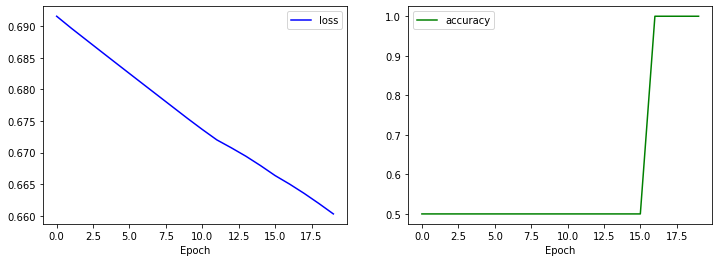

In [69]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [70]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 116ms/step - loss: 0.6589 - accuracy: 1.0000


[0.6588609218597412, 1.0]

## 예측

In [71]:
# 추론할 입력
string = '나는 기분이 우울해'

In [72]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [73]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [74]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [75]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[0.52925026, 0.47074974]], dtype=float32)

In [76]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [77]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
